In [15]:
import pandas as pd
import warnings
import mlxtend
import sklearn

warnings.filterwarnings("ignore")
df = pd.read_csv("./data_banknote_authentication.csv",header=None)
df.columns =["variance_of_wavelet_transformed_image","skewness_of_wavelet_transformed_image","kurtosis_of_wavelet_transformed_image","entropy_of_image","target"]
df.head(30)


variance_of_wavelet_transformed_image  \
0                                 3.62160   
1                                 4.54590   
2                                 3.86600   
3                                 3.45660   
4                                 0.32924   
5                                 4.36840   
6                                 3.59120   
7                                 2.09220   
8                                 3.20320   
9                                 1.53560   
10                                1.22470   
11                                3.98990   
12                                1.89930   
13                               -1.57680   
14                                3.40400   
15                                4.67650   
16                                2.67190   
17                                0.80355   
18                                1.44790   
19                                5.24230   
20                                5.78670   
21                                0.32920   
22                                3.93620   
23                                0.93584   
24                                4.43380   
25                                0.70570   
26                                1.14320   
27                               -0.38214   
28                                6.56330   
29                                4.89060   

    skewness_of_wavelet_transformed_image  \
0                                  8.6661   
1                                  8.1674   
2                                 -2.6383   
3                                  9.5228   
4                                 -4.4552   
5                                  9.6718   
6                                  3.0129   
7                                 -6.8100   
8                                  5.7588   
9                                  9.1772   
10                                 8.7779   
11                                -2.7066   
12                                 7.6625   
13                                10.8430   
14                                 8.7261   
15                                -3.3895   
16                                 3.0646   
17                                 2.8473   
18                                -4.8794   
19                                11.0272   
20                                 7.8902   
21                                -4.4552   
22                                10.1622   
23                                 8.8855   
24                                 9.8870   
25                                -5.4981   
26                                -3.7413   
27                                 8.3909   
28                                 9.8187   
29                                -3.3584   

    kurtosis_of_wavelet_transformed_image  entropy_of_image  target  
0                                -2.80730          -0.44699       0  
1                                -2.45860          -1.46210       0  
2                                 1.92420           0.10645       0  
3                                -4.01120          -3.59440       0  
4                                 4.57180          -0.98880       0  
5                                -3.96060          -3.16250       0  
6                                 0.72888           0.56421       0  
7                                 8.46360          -0.60216       0  
8                                -0.75345          -0.61251       0  
9                                -2.27180          -0.73535       0  
10                               -2.21350          -0.80647       0  
11                                2.39460           0.86291       0  
12                                0.15394          -3.11080       0  
13                                2.54620          -2.93620       0  
14                               -2.99150          -0.57242       0  
15                                3.48960           1.47710       0  
16                    

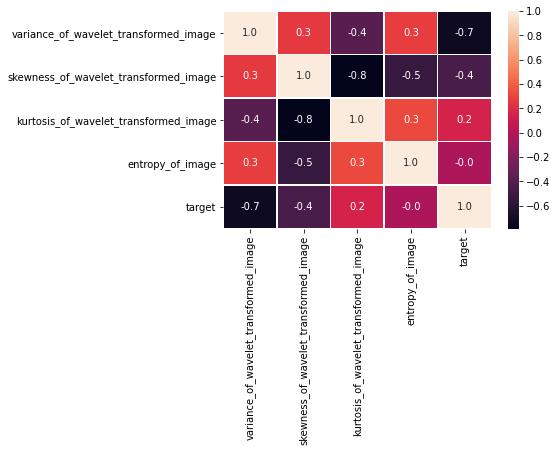

variance_of_wavelet_transformed_image  \
variance_of_wavelet_transformed_image                               1.000000   
skewness_of_wavelet_transformed_image                               0.264026   
kurtosis_of_wavelet_transformed_image                              -0.380850   
entropy_of_image                                                    0.276817   
target                                                             -0.724843   

                                       skewness_of_wavelet_transformed_image  \
variance_of_wavelet_transformed_image                               0.264026   
skewness_of_wavelet_transformed_image                               1.000000   
kurtosis_of_wavelet_transformed_image                              -0.786895   
entropy_of_image                                                   -0.526321   
target                                                             -0.444688   

                                       kurtosis_of_wavelet_transformed_image  \
variance_of_wavelet_transformed_image                              -0.380850   
skewness_of_wavelet_transformed_image                              -0.786895   
kurtosis_of_wavelet_transformed_image                               1.000000   
entropy_of_image                                                    0.318841   
target                                                              0.155883   

                                       entropy_of_image    target  
variance_of_wavelet_transformed_image          0.276817 -0.724843  
skewness_of_wavelet_transformed_image         -0.526321 -0.444688  
kurtosis_of_wavelet_transformed_image          0.318841  0.155883  
entropy_of_image                               1.000000 -0.023424  
target                                        -0.023424  1.000000

In [18]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
#correlation map
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

# Print the correlation matrix
df.corr()



The train accuracy score of perceptron  0.9834791059280855
The train accuracy score of adaline  0.9737609329446064
The test accuracy score of perceptron  0.9883381924198251
The test accuracy score of adaline  0.9854227405247813


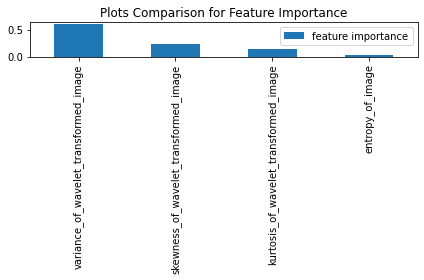

In [19]:
# Get feature importance scores for from random forest regressor
reg = RandomForestRegressor(n_estimators=50)
reg.fit(df.iloc[:,:-1], df.iloc[:,-1])
df_feature_importance = pd.DataFrame(reg.feature_importances_,index=df.columns[:-1], columns=['feature importance']).sort_values('feature importance', ascending=False)
# all feature importance for each tree
# Melted data i.e., long format
df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in reg.estimators_], columns=df.columns[:-1])
df_feature_all.head()
df_feature_long = pd.melt(df_feature_all,var_name='feature name', value_name='values')
df_feature_importance.plot(kind='bar', title='Plots Comparison for Feature Importance');
plt.tight_layout()

# From feature importance scores and correlation map we can see that feature 4 is not correlate much with target and hence
# can be neglected for classification. Here feature_1,feature_2,feature_3 affect the most for classification
# Perceptron model
from sklearn.model_selection import train_test_split
X =df.iloc[:,:-2]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)

from mlxtend.classifier import Perceptron
from mlxtend.classifier import Adaline
import numpy as np

ppn = Perceptron(epochs=50, eta=0.05, random_seed=0)
ppn.fit(np.array(X_train), np.array(y_train))
ada = Adaline(epochs=50, eta=0.05, random_seed=0)
ada.fit(X_train, y_train)
print("The train accuracy score of perceptron ",ppn.score(X_train,y_train))
print("The train accuracy score of adaline ",ada.score(X_train,y_train))
print("The test accuracy score of perceptron ",ppn.score(X_test,y_test))
print("The test accuracy score of adaline ",ada.score(X_test,y_test))
